# Data import

In [ ]:
# 필요한 패키지/모듈 가져오기

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# Google Drive Mount

from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/Shareddrives/컨디션난조,분위기고조/실습과제/5주차/

/content/gdrive/Shareddrives/컨디션난조,분위기고조/실습과제/5주차


In [ ]:
%ls

'4_CBR(knn)_AR_CF.ipynb'
 Admission_Predict.csv
 anime.csv
 AR_CF_anime.csv
 books.csv
'bread basket.csv'
 frequent_itemsets.csv
 movies_metadata.csv
 rating_complete_anime.csv
 ratings_small.csv
'[컨디션난조 분위기고조] week5_AR_CF_수진2.ipynb'
'[컨디션난조 분위기고조] week5_AR_CF_연재.ipynb'
'[컨디션난조 분위기고조] week5_AR_CF_수진.ipynb'
'[컨디션난조 분위기고조] week5_AR_CF.ipynb'
'[컨디션난조 분위기고조] week5_AR_CF_pre.ipynb'
'[컨디션난조 분위기고조] week5_KNN_AR_CF_보고서.docx'
'[컨디션난조 분위기고조] week5_KNN_회귀.ipynb'
'[컨디션난조_분위기고조]_week5_KNN_가람_분류.ipynb'


In [ ]:
df = pd.read_csv('./[컨디션난조_분위기고조]_week5_KNN_데이터.csv')

# Data Observation

In [ ]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
df.drop(['Serial No.'], axis=1, inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

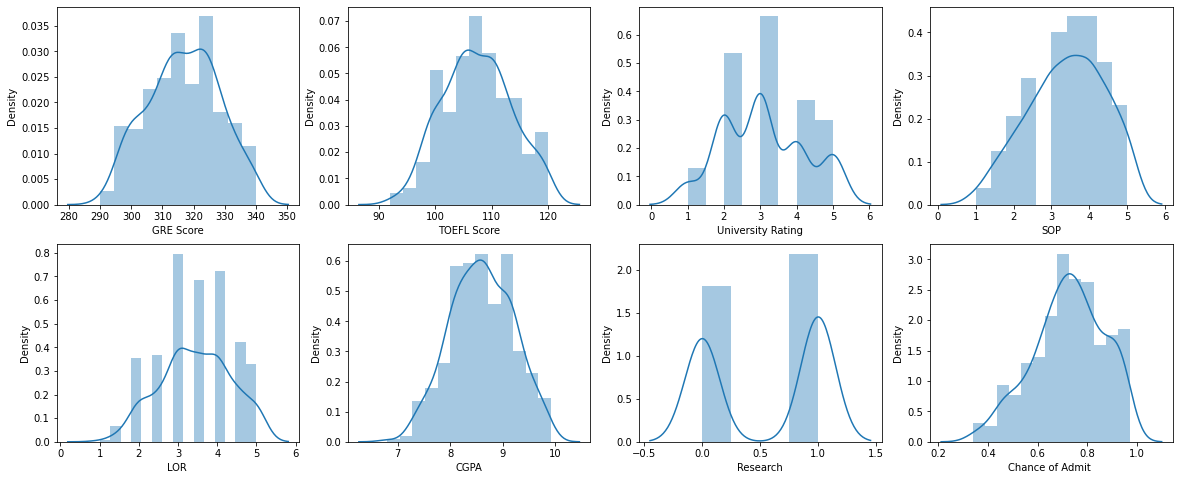

In [ ]:
f, axes = plt.subplots(2, 4, figsize=(20, 8))

sns.distplot(df[df.columns[1]], ax=axes[0, 0])
sns.distplot(df[df.columns[2]], ax=axes[0, 1])
sns.distplot(df[df.columns[3]], ax=axes[0, 2])
sns.distplot(df[df.columns[4]], ax=axes[0, 3])
sns.distplot(df[df.columns[5]], ax=axes[1, 0])
sns.distplot(df[df.columns[6]], ax=axes[1, 1])
sns.distplot(df[df.columns[7]], ax=axes[1, 2])
sns.distplot(df[df.columns[8]], ax=axes[1, 3])



plt.show()

# Preprocessing

In [ ]:
x = df[df.columns[:-1]]
y = df[['Chance of Admit ']]

## Scaling

Y의 분포 불균형



- 관측치들 간 유사성을 측정할 때 변수의 크기에 영향을 받지 않도록 scaling 진행 ([예시](https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn))

In [ ]:
# Z-score Standardization
from sklearn.preprocessing import StandardScaler
scaled_x = pd.DataFrame(StandardScaler().fit_transform(x), columns=x.columns, index = x.index)

In [ ]:
scaled_x.describe() # 표준화 이후, 독립변수(feature)의 기초통계량

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,-3.785861e-16,5.412337e-16,7.147061e-16,1.859624e-16,-3.019807e-16,8.076873e-16,2.942091e-17
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-2.339367e+00,-2.542098e+00,-1.827457e+00,-2.386613e+00,-2.733036e+00,-3.020504e+00,-1.099975e+00
25%,-7.685900e-01,-7.274920e-01,-9.520286e-01,-8.949798e-01,-5.042604e-01,-7.201909e-01,-1.099975e+00
50%,1.679859e-02,-6.763531e-02,-7.660001e-02,9.944220e-02,5.293342e-02,1.859559e-02,9.091117e-01
75%,7.149218e-01,7.571856e-01,7.988286e-01,5.966532e-01,6.101273e-01,7.783704e-01,9.091117e-01
max,2.023903e+00,2.076899e+00,1.674257e+00,1.591075e+00,1.724515e+00,2.218165e+00,9.091117e-01


In [ ]:
y.describe()

,Chance of Admit
count,400.000000
mean,0.724350
std,0.142609
min,0.340000
25%,0.640000
50%,0.730000
75%,0.830000
max,0.970000


In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# EDA

In [ ]:
for i in df.columns:
    fig = px.histogram(df, x = i, y = 'Chance of Admit ')
    fig.show()

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

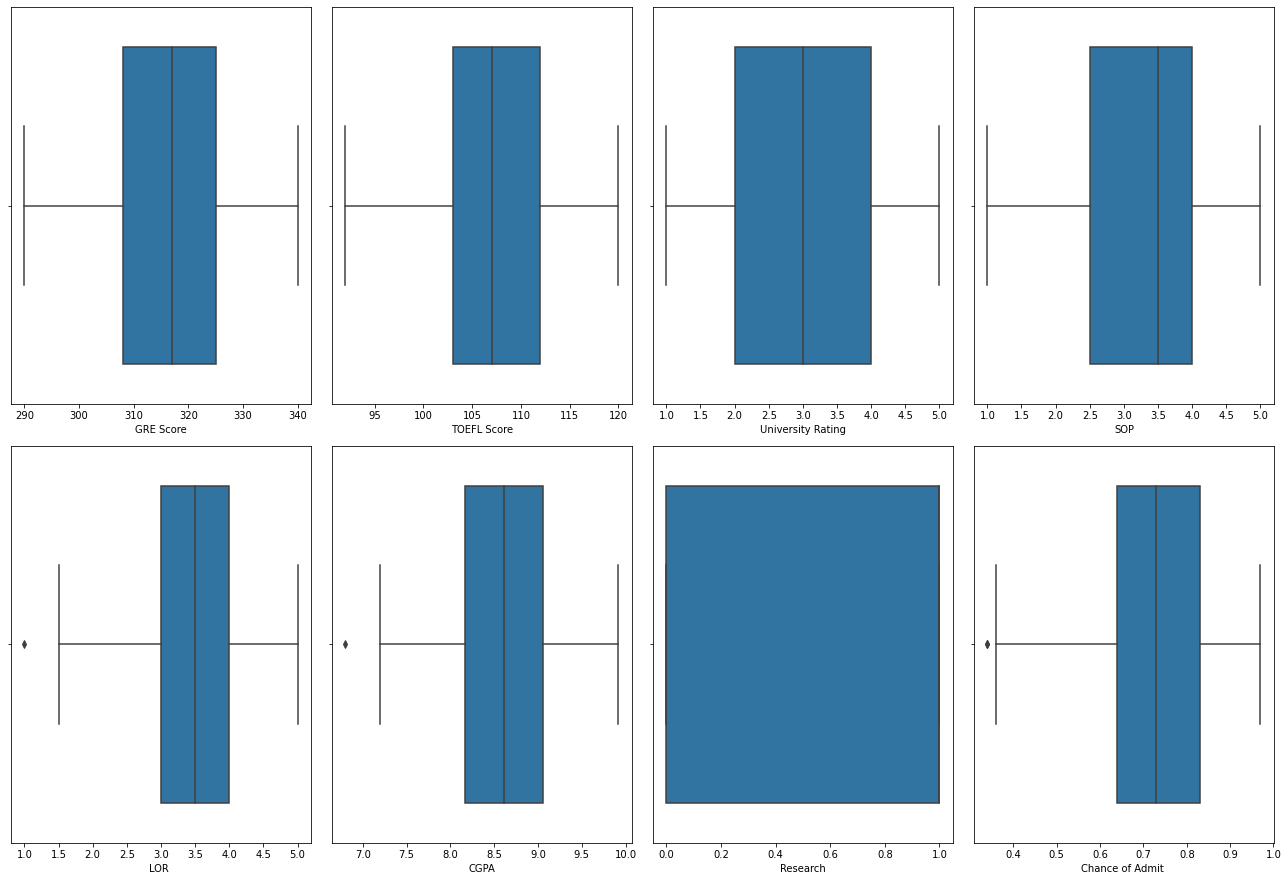

In [ ]:
#target인 quality와 다른 변수들의 관계를 확인
num_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research', 'Chance of Admit ']

plt.figure(figsize=(18,18))
for i in range(0,8):
  plt.subplot(3,4,i+1)
  sns.boxplot(x = df[num_cols[i]])
plt.tight_layout()
plt.show()

# KNN classification

- iteration을 반복할 때마다 distance metric을 업데이트하는 것은 계산 비용이 많이 듦 (KNN: lazy learning algorithm)
- best K값을 선택하는 통계적 방법은 없으므로, 각 K에 따른 오류율을 비교하여 K 선택
  - K 값을 작게 선택하면 결정 경계가 불안정해질 수 있음
  - 큰 K 값은 결정 경계를 부드럽게 하기 때문에 분류에 더 좋을 수 있음


## Train test split
- 적절한 k값 선택을 위해 train, valid, test set으로 구분

In [ ]:
y_admit2 = y.copy()

합격 확률이
- 0.8 보다 작으면 불합격
- 0.8 이상이면 합격

In [ ]:
for i in range(0, 400):
    if y_admit2.values[i] <0.8 :
        y_admit2.iloc[i] = 0
    else :
        y_admit2.iloc[i] = 1

In [ ]:
y_admit2.columns = ['label of Admit']

In [ ]:
y_admit2

,label of Admit
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
395,1.0
396,1.0
397,1.0
398,0.0


In [ ]:
y_admit2 = y_admit2.astype('int')

In [ ]:
print(y_admit2['label of Admit'].value_counts()) 

0    272
1    128
Name: label of Admit, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y_admit2, test_size = 0.2, random_state = 312)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 312)

In [ ]:
print("train set:",x_train.shape)
print("valid set:",x_valid.shape)
print("test set:",x_test.shape)

train set: (256, 7)
valid set: (64, 7)
test set: (80, 7)


## Sampling
- 본 실습에서는 랜덤 언더 샘플링을 진행하여 비중을 맞춰주고자 함

In [ ]:
y_train.value_counts()

label of Admit
0                 187
1                  69
dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X_resampled, y_resampled = RandomOverSampler(random_state=312).fit_resample(x_train, y_train)

In [ ]:
print(y_resampled['label of Admit'].value_counts()) 

0    187
1    187
Name: label of Admit, dtype: int64


## 1) euclidean 거리

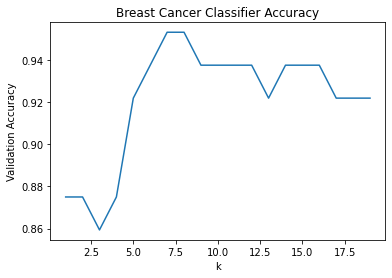

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

'''
k를 변화시켜가며 더 적합한 k를 찾기 위해 plot을 통해 accuracy를 확인
'''

k_list = range(1,20) # k= 1~20까지 조절
accuracies = []

best_k = 0
best_acc = 0
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k, weights="distance", metric="euclidean")
    classifier.fit(X_resampled, y_resampled['label of Admit'])
    acc = classifier.score(x_valid, y_valid)
    accuracies.append(acc)
    if best_acc < acc:
        best_acc = acc
        best_k = k
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

In [ ]:
best_k

7

In [ ]:
for i in range(7, 9):
    classifier = KNeighborsClassifier(n_neighbors = i, weights="distance", metric="euclidean")
    classifier.fit(X_resampled, y_resampled['label of Admit'])
    print(i, 'Accuracy = ',classifier.score(x_test, y_test)) # accuracy

7 Accuracy =  0.8625
8 Accuracy =  0.8625


In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 8, weights="distance", metric="euclidean")
classifier.fit(X_resampled, y_resampled['label of Admit'])

KNeighborsClassifier(metric='euclidean', n_neighbors=8, weights='distance')

### Evaluation

[[40  7]
 [ 4 29]]


Text(0.5, 1.0, 'Confusion Matrix')

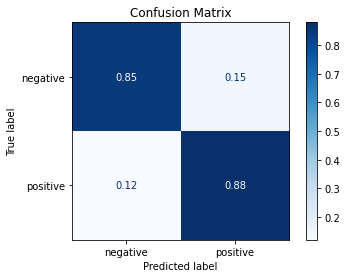

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import cm

y_pred = classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))

plot = plot_confusion_matrix(classifier, # 분류 모델
                             x_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=['negative', 'positive'], # 표에 표시할 labels
                             cmap=cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize= 'true') # 'true'로 지정하여 개수가 아닌 퍼센트로 정규화.
plot.ax_.set_title('Confusion Matrix')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("   Recall:", recall_score(y_test, y_pred))
print(" F1 score:", f1_score(y_test, y_pred))

 Accuracy: 0.8625
Precision: 0.8055555555555556
   Recall: 0.8787878787878788
 F1 score: 0.8405797101449276


## 2) manhattan

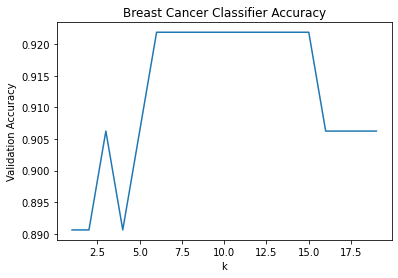

In [ ]:
'''
k를 변화시켜가며 더 적합한 k를 찾기 위해 plot을 통해 accuracy를 확인
'''

k_list = range(1,20) # k= 1~20까지 조절
accuracies = []

best_k = 0
best_acc = 0
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k, weights="distance", metric="manhattan")
    classifier.fit(X_resampled, y_resampled['label of Admit'])
    acc = classifier.score(x_valid, y_valid)
    accuracies.append(acc)
    if best_acc < acc:
        best_acc = acc
        best_k = k
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

In [ ]:
best_k

6

In [ ]:
for i in range(6, 16):
    classifier = KNeighborsClassifier(n_neighbors = i, weights="distance", metric="manhattan")
    classifier.fit(X_resampled, y_resampled['label of Admit'])
    print(i, 'Accuracy = ',classifier.score(x_test, y_test)) # accuracy

6 Accuracy =  0.8625
7 Accuracy =  0.875
8 Accuracy =  0.8875
9 Accuracy =  0.875
10 Accuracy =  0.8875
11 Accuracy =  0.8875
12 Accuracy =  0.8875
13 Accuracy =  0.9
14 Accuracy =  0.9
15 Accuracy =  0.9125


In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 14, weights="distance", metric="manhattan")
classifier.fit(X_resampled, y_resampled['label of Admit'])

KNeighborsClassifier(metric='manhattan', n_neighbors=14, weights='distance')

### Evaluation

[[40  7]
 [ 1 32]]


Text(0.5, 1.0, 'Confusion Matrix')

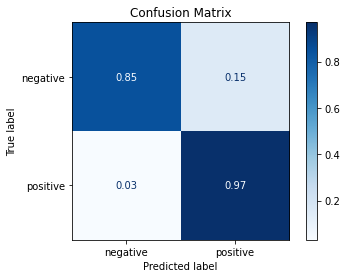

In [ ]:
y_pred = classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))

plot = plot_confusion_matrix(classifier, # 분류 모델
                             x_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=['negative', 'positive'], # 표에 표시할 labels
                             cmap=cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true'로 지정하여 개수가 아닌 퍼센트로 정규화.
plot.ax_.set_title('Confusion Matrix')

In [ ]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("   Recall:", recall_score(y_test, y_pred))
print(" F1 score:", f1_score(y_test, y_pred))

 Accuracy: 0.9
Precision: 0.8205128205128205
   Recall: 0.9696969696969697
 F1 score: 0.8888888888888888


## 3) chebyshev 거리

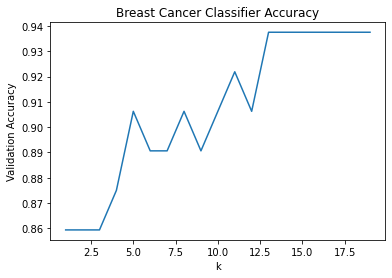

In [ ]:
'''
k를 변화시켜가며 더 적합한 k를 찾기 위해 plot을 통해 accuracy를 확인
'''

k_list = range(1,20) # k= 1~20까지 조절
accuracies = []

best_k = 0
best_acc = 0
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k, weights="distance", metric="chebyshev")
    classifier.fit(X_resampled, y_resampled['label of Admit'])
    acc = classifier.score(x_valid, y_valid)
    accuracies.append(acc)
    if best_acc < acc:
        best_acc = acc
        best_k = k
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

In [ ]:
best_k

13

In [ ]:
for i in range(13, 21):
    classifier = KNeighborsClassifier(n_neighbors = i, weights="distance", metric="chebyshev")
    classifier.fit(X_resampled, y_resampled['label of Admit'])
    print(i, 'Accuracy = ',classifier.score(x_test, y_test)) # accuracy

13 Accuracy =  0.9375
14 Accuracy =  0.925
15 Accuracy =  0.9375
16 Accuracy =  0.95
17 Accuracy =  0.95
18 Accuracy =  0.95
19 Accuracy =  0.95
20 Accuracy =  0.9375


In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 19, weights="distance", metric="chebyshev")
classifier.fit(X_resampled, y_resampled['label of Admit'])

KNeighborsClassifier(metric='chebyshev', n_neighbors=19, weights='distance')

### Evaluation

[[44  3]
 [ 1 32]]


Text(0.5, 1.0, 'Confusion Matrix')

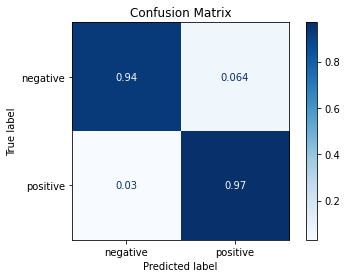

In [ ]:
y_pred = classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))

plot = plot_confusion_matrix(classifier, # 분류 모델
                             x_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=['negative', 'positive'], # 표에 표시할 labels
                             cmap=cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true'로 지정하여 개수가 아닌 퍼센트로 정규화.
plot.ax_.set_title('Confusion Matrix')

In [ ]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("   Recall:", recall_score(y_test, y_pred))
print(" F1 score:", f1_score(y_test, y_pred))

 Accuracy: 0.95
Precision: 0.9142857142857143
   Recall: 0.9696969696969697
 F1 score: 0.9411764705882354


# KNN Regression

## Train test split
- 적절한 k값 선택을 위해 train, valid, test set으로 구분

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.2, random_state = 312)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 312)

In [ ]:
print("train set:",x_train.shape)
print("valid set:",x_valid.shape)
print("test set:",x_test.shape)

train set: (256, 7)
valid set: (64, 7)
test set: (80, 7)


## 1) Manhattan 거리

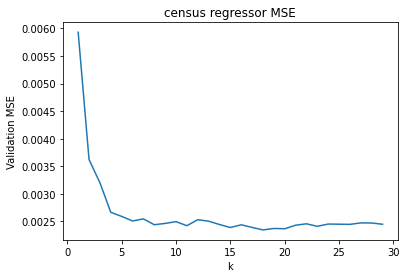

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

'''
k를 변화시켜가며 더 적합한 k를 찾기 위해 plot을 통해 accuracy를 확인
'''

best_mse = 1000000000
k_list = range(1,30) # k= 1~20까지 조절
mses = []
for k in k_list:
  regressor_k = KNeighborsRegressor(n_neighbors = k, weights = "distance", metric = 'manhattan')
  regressor_k.fit(x_train, y_train)
  mse = mean_squared_error(y_valid, regressor_k.predict(x_valid))
  mses.append(mse)
  if best_mse > mse:
    best_mse = mse
    best_k = k
plt.plot(k_list, mses)
plt.xlabel("k")
plt.ylabel("Validation MSE")
plt.title("census regressor MSE")
plt.show()

In [ ]:
best_k

18

In [ ]:
regressor = KNeighborsRegressor(n_neighbors = best_k, weights = "distance", metric = 'manhattan')

In [ ]:
regressor.fit(x_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=18, weights='distance')

In [ ]:
pred_y = regressor.predict(x_test)
pred_y[:5]

array([[0.83206369],
       [0.92591654],
       [0.60373004],
       [0.87389329],
       [0.56035299]])

### Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print('Manhattan 거리')
print("MSE :", mean_squared_error(y_test, pred_y))
print("RMSE:", mean_squared_error(y_test, pred_y, squared=False))
print("MAE :", mean_absolute_error(y_test, pred_y))
print("MAPE:", mean_absolute_percentage_error(y_test, pred_y))

Manhattan 거리
MSE : 0.0033707408827133175
RMSE: 0.05805808197583966
MAE : 0.042675857605647585
MAPE: 0.06464887453420295


## 2) Euclidean 거리

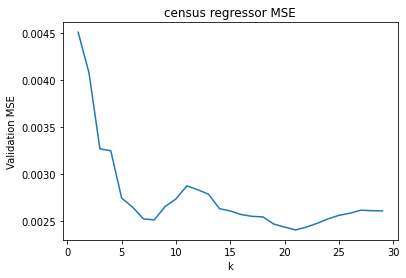

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

'''
k를 변화시켜가며 더 적합한 k를 찾기 위해 plot을 통해 accuracy를 확인
'''

best_mse = 1000000000
k_list = range(1,30) # k= 1~20까지 조절
mses = []
for k in k_list:
  regressor_k = KNeighborsRegressor(n_neighbors = k, weights = "distance", metric = 'euclidean')
  regressor_k.fit(x_train, y_train)
  mse = mean_squared_error(y_valid, regressor_k.predict(x_valid))
  mses.append(mse)
  if best_mse > mse:
    best_mse = mse
    best_k = k
plt.plot(k_list, mses)
plt.xlabel("k")
plt.ylabel("Validation MSE")
plt.title("census regressor MSE")
plt.show()

In [ ]:
best_k

21

In [ ]:
regressor = KNeighborsRegressor(n_neighbors = best_k, weights = "distance", metric = 'euclidean')

In [ ]:
regressor.fit(x_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=21, weights='distance')

In [ ]:
pred_y = regressor.predict(x_test)
pred_y[:5]

array([[0.82737787],
       [0.92513484],
       [0.61187853],
       [0.86431562],
       [0.59483169]])

### Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print('Euclidean 거리')
print("MSE :", mean_squared_error(y_test, pred_y))
print("RMSE:", mean_squared_error(y_test, pred_y, squared=False))
print("MAE :", mean_absolute_error(y_test, pred_y))
print("MAPE:", mean_absolute_percentage_error(y_test, pred_y))

Euclidean 거리
MSE : 0.0031741468838765797
RMSE: 0.056339567657877704
MAE : 0.041445350780687465
MAPE: 0.06243273984066748


## 3) Chebyshev 거리

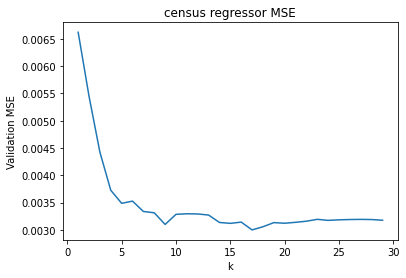

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

'''
k를 변화시켜가며 더 적합한 k를 찾기 위해 plot을 통해 accuracy를 확인
'''

best_mse = 1000000000
k_list = range(1,30) # k= 1~20까지 조절
mses = []
for k in k_list:
  regressor_k = KNeighborsRegressor(n_neighbors = k, weights = "distance", metric = 'chebyshev')
  regressor_k.fit(x_train, y_train)
  mse = mean_squared_error(y_valid, regressor_k.predict(x_valid))
  mses.append(mse)
  if best_mse > mse:
    best_mse = mse
    best_k = k
plt.plot(k_list, mses)
plt.xlabel("k")
plt.ylabel("Validation MSE")
plt.title("census regressor MSE")
plt.show()

In [ ]:
best_k

17

In [ ]:
regressor = KNeighborsRegressor(n_neighbors = best_k, weights = "distance", metric = 'chebyshev')

In [ ]:
regressor.fit(x_train, y_train)

KNeighborsRegressor(metric='chebyshev', n_neighbors=17, weights='distance')

In [ ]:
pred_y = regressor.predict(x_test)
pred_y[:5]

array([[0.8319629 ],
       [0.93196486],
       [0.5661955 ],
       [0.87604315],
       [0.61286736]])

### Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print('Chebyshev 거리')
print("MSE :", mean_squared_error(y_test, pred_y))
print("RMSE:", mean_squared_error(y_test, pred_y, squared=False))
print("MAE :", mean_absolute_error(y_test, pred_y))
print("MAPE:", mean_absolute_percentage_error(y_test, pred_y))

Chebyshev 거리
MSE : 0.003456307701098972
RMSE: 0.05879037081953959
MAE : 0.04296763443999216
MAPE: 0.06333651349538219
